In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
zscores = pd.read_csv(r'..\..\datasets\df_rob_zscores.csv', encoding='latin-1')
zscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065547 entries, 0 to 2065546
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   nf_timestamp      float64
 1   emit_lat          float64
 2   emit_long         float64
 3   prod_ncm          float64
 4   prod_quant        float64
 5   prod_valor_unit   float64
 6   prod_valor_total  float64
dtypes: float64(7)
memory usage: 110.3 MB


In [38]:
ol_iforest = pd.read_csv(r'..\isolation forest\output\outliers.csv', encoding='latin-1')
ol_iforest.set_index('idx', inplace=True)
ol_iforest = ol_iforest.sort_values(by='anomaly_score', ascending=True)
iforest_idx = ol_iforest.index.values
zscores_iforest = zscores.loc[iforest_idx]
zscores_iforest = zscores_iforest.reindex(iforest_idx)
zscores_iforest

nf_timestamp  emit_lat  emit_long  prod_ncm  prod_quant  \
2065189      1.649402 -2.418891  -4.115000  1.855617    0.843664   
2065190      1.649402 -2.418891  -4.115000  1.855617    3.934994   
2065186      1.649402 -2.418891  -4.115000  1.855300    0.486859   
2065182      1.649402 -2.418891  -4.115000  1.363194    2.055302   
2064097     -0.873202 -4.339724  -3.280780 -1.536312   -0.005551   
...               ...       ...        ...       ...         ...   
1632821     -0.863440 -0.361353  -3.771175 -1.536312   -0.005052   
1557850     -0.776576 -4.108867  -3.384986 -1.394689    0.379592   
1558003     -1.159569 -4.108867  -3.384986 -1.394689    0.314207   
1557932     -0.942384 -4.108867  -3.384986 -1.394689    0.405270   
1557847     -1.159576 -4.108867  -3.384986 -1.394689    0.320706   

         prod_valor_unit  prod_valor_total  
2065189        -0.003826          3.187544  
2065190        -0.003888          1.063221  
2065186        -0.003801          2.516508  
2065182        -0.003885          0.924347  
2064097         2.551646          4.734993  
...                  ...               ...  
1632821         0.178061          5.396719  
1557850        -0.003859          0.708327  
1558003        -0.003859          0.584898  
1557932        -0.003859          0.756801  
1557847        -0.003859          0.597165  

[207 rows x 7 columns]

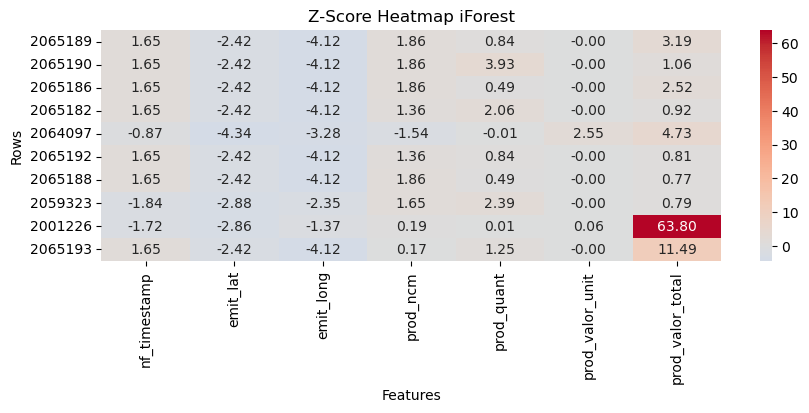

In [39]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_iforest.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap iForest')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [40]:
ol_som = pd.read_csv(r'..\som\output\outliers.csv', encoding='latin-1')
ol_som.set_index('idx', inplace=True)
ol_som = ol_som.sort_values(by='anomaly_score', ascending=False)
som_idx = ol_som.index.values
zscores_som = zscores.loc[som_idx]
zscores_som = zscores_som.reindex(som_idx)
zscores_som

nf_timestamp  emit_lat  emit_long  prod_ncm   prod_quant  \
2000736     -1.924793  0.145968   0.669924  0.194048    -0.005568   
1828069     -1.909460  0.143842   0.585497 -0.475607  1329.620046   
1826921     -1.919361  0.143842   0.585497 -0.475606   398.882105   
1827348     -1.919361  0.143842   0.585497 -0.475606   249.299221   
394482       1.635259  0.270015   0.434196 -0.475813   166.197619   
...               ...       ...        ...       ...          ...   
1631567     -0.935611 -0.361353  -3.771175 -1.536312    -0.005568   
1634602     -0.935611 -0.361353  -3.771175 -1.536312    -0.005568   
707955      -1.637360  0.290949   0.675771  0.194048     2.925160   
731913      -1.636364  0.290949   0.675771  0.194048     2.925160   
2051292     -0.991870 -2.563826  -2.462700  1.648422    -0.005568   

         prod_valor_unit  prod_valor_total  
2000736      1426.558837       1326.817665  
1828069        -0.003893          0.399545  
1826921        -0.003893          0.019241  
1827348        -0.003893          0.032553  
394482         -0.003893          0.026849  
...                  ...               ...  
1631567         4.986875          4.623092  
1634602         4.986875          4.623092  
707955         -0.003566         53.562657  
731913         -0.003566         53.562657  
2051292         4.908014          4.549744  

[207 rows x 7 columns]

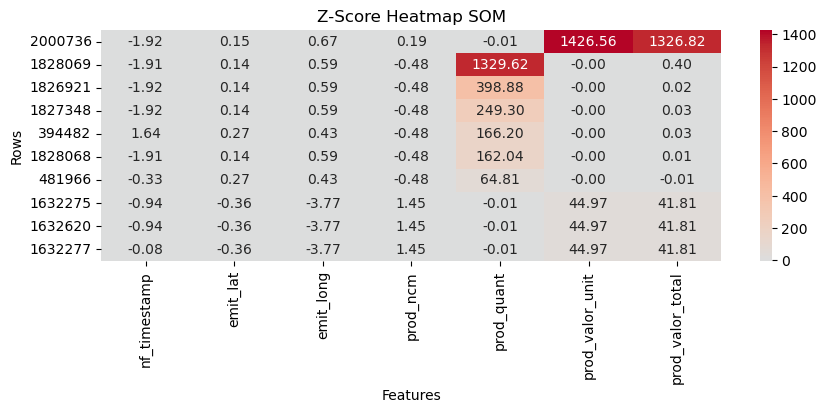

In [41]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_som.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [42]:
ol_lof = pd.read_csv(r'..\lof\output\outliers.csv', encoding='latin-1')
ol_lof.set_index('idx', inplace=True)
ol_lof = ol_lof.sort_values(by='anomaly_score', ascending=True)
lof_idx = ol_lof.index.values
zscores_lof = zscores.loc[lof_idx]
zscores_lof = zscores_lof.reindex(lof_idx)
zscores_lof

nf_timestamp  emit_lat  emit_long  prod_ncm  prod_quant  \
1942852      1.140539 -3.058284  -2.212400 -0.476596   -0.005534   
1942893      0.170058 -3.058284  -2.212400 -0.476596   -0.005534   
1625205     -0.161217 -3.045785  -2.177036  1.535850   -0.005568   
2065437      1.442056 -4.320462  -3.119957  1.438343   -0.005568   
2055257     -0.123265 -2.820592  -1.639824  1.535856   -0.005568   
...               ...       ...        ...       ...         ...   
1054912      1.345242 -0.492834  -0.475642  1.537787   -0.005568   
1077051     -0.731187  0.100666   0.675094  1.434043   -0.005568   
1087231     -0.925593  0.100666   0.675094  1.043064   -0.005568   
540577      -1.077738  0.270015   0.434196  1.647102   -0.003091   
809228       1.562835  0.290949   0.675771 -0.475606   -0.003756   

         prod_valor_unit  prod_valor_total  
1942852         0.914643          2.544184  
1942893         0.914643          2.544184  
1625205         0.935856          0.855267  
2065437         0.928368          0.848302  
2055257         0.934308          0.853827  
...                  ...               ...  
1054912        -0.000851         -0.015958  
1077051         0.003262         -0.012132  
1087231         0.003876         -0.011562  
540577         -0.003834         -0.010516  
809228         -0.003636          0.007567  

[207 rows x 7 columns]

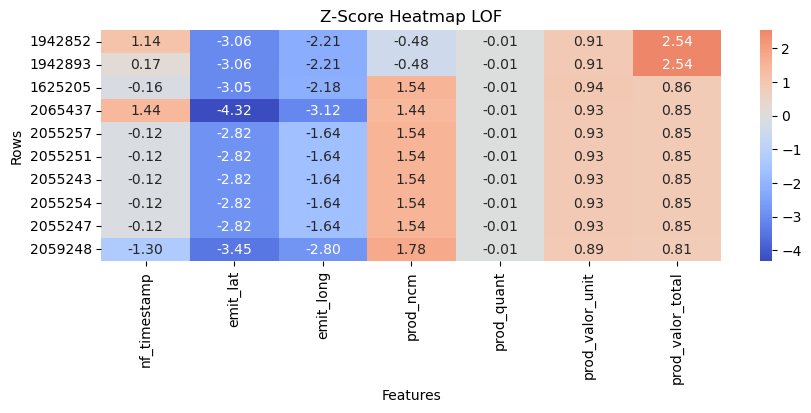

In [43]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_lof.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [44]:
intersec = pd.read_csv(r'output\som_iforest_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

nf_timestamp  emit_lat  emit_long  prod_ncm  prod_quant  \
idx                                                                
2055047     -1.443320 -3.042096  -2.215465  1.647074   13.849115   
2055049     -1.208603 -3.042096  -2.215465  1.647074   13.849115   
1631882      0.877697 -0.361353  -3.771175 -1.536312   -0.005568   
1988875     -1.816513 -3.045426  -2.249988  1.650321   -0.005568   
2001164     -1.496970 -2.861425  -1.368326  0.194048    0.011036   
2055055     -1.443320 -3.042096  -2.215465  1.647074   13.835819   
1631760     -0.259873 -0.361353  -3.771175 -1.536312   -0.005568   
2055057     -1.198862 -3.042096  -2.215465  1.647074   13.849115   
1632275     -0.944144 -0.361353  -3.771175  1.454199   -0.005568   
1634197      1.543190 -0.361353  -3.771175 -1.536312   -0.005568   
1632407      0.678798 -0.361353  -3.771175 -1.536312   -0.005568   
1947004      1.503911 -3.872567  -3.571266 -0.475607    9.966608   
2055069     -1.431646 -3.042096  -2.215465  1.647074   13.849115   
1633054      1.215468 -0.361353  -3.771175 -1.536312   -0.005568   
2055071     -0.232579 -3.042096  -2.215465  1.647074   16.614736   
1089316     -1.496703 -2.915875  -1.345809  0.194048    0.011036   
2055077     -1.427313 -3.042096  -2.215465  1.647074   13.849115   
1629222     -1.063001 -3.045785  -2.177036  1.536202   -0.005568   
1632039      0.255489 -0.361353  -3.771175 -1.536312   -0.005568   
2055079     -0.209357 -3.042096  -2.215465  1.647074   16.614736   
1634602     -0.935611 -0.361353  -3.771175 -1.536312   -0.005568   
1634603     -0.081405 -0.361353  -3.771175 -1.536312   -0.005568   
2055085     -1.427217 -3.042096  -2.215465  1.647074   13.835819   
1632761      0.887099 -0.361353  -3.771175 -1.536312   -0.005568   
2055093     -1.230582 -3.042096  -2.215465  1.647074   13.835819   
1628482     -1.063003 -3.045785  -2.177036  1.536202   -0.005568   
1626310      1.649123 -3.045785  -2.177036  0.194048    2.049718   
1626311      1.649123 -3.045785  -2.177036  0.194048    2.049718   
2055368      1.562697 -2.158766  -3.334151  1.648447   -0.005568   
2001226     -1.716261 -2.861425  -1.368326  0.194048    0.011036   
1631567     -0.935611 -0.361353  -3.771175 -1.536312   -0.005568   
1631699     -0.041093 -0.361353  -3.771175 -1.536312   -0.005568   
2051292     -0.991870 -2.563826  -2.462700  1.648422   -0.005568   
2060002     -1.275767 -2.911282  -1.322826  0.194048    0.459785   
2055270      1.562697 -2.158766  -3.334151  1.648447   -0.005568   
1627751     -1.063003 -3.045785  -2.177036  1.536202   -0.005568   
1632876     -1.279989 -0.361353  -3.771175 -1.536312   -0.005568   
1632620     -0.942061 -0.361353  -3.771175  1.454199   -0.005568   
1633390      1.345039 -0.361353  -3.771175  0.193734    1.977669   
1633391      1.345039 -0.361353  -3.771175  0.193734    1.977669   
2055033     -1.228345 -3.042096  -2.215465  1.647074   13.849115   
2059259     -0.864273 -3.448565  -2.801870  1.782901   -0.005568   
1634300      1.619369 -0.361353  -3.771175 -1.536312   -0.005568   
2055038     -1.208608 -3.042096  -2.215465  1.647074   13.835819   

         prod_valor_unit  prod_valor_total  
idx                                         
2055047        -0.003891          1.945152  
2055049        -0.003891          1.945152  
1631882         8.582720          7.967564  
1988875         8.543241          7.930845  
2001164         0.064723         63.800337  
2055055        -0.003891          1.943267  
1631760         5.371021          4.980384  
2055057        -0.003891          1.945152  
1632275        44.970129         41.811249  
1634197        11.707763         10.874146  
1632407        32.131696         29.870309  
1947004        -0.003892          0.665757  
2055069        -0.003891          1.945152  
1633054        12.521990         11.631453  
2055071        -0.003891          2.337186  
1089316         0.064723         63.800337  
2055077        -0.003891          1.945152  
1629222         7.969390 

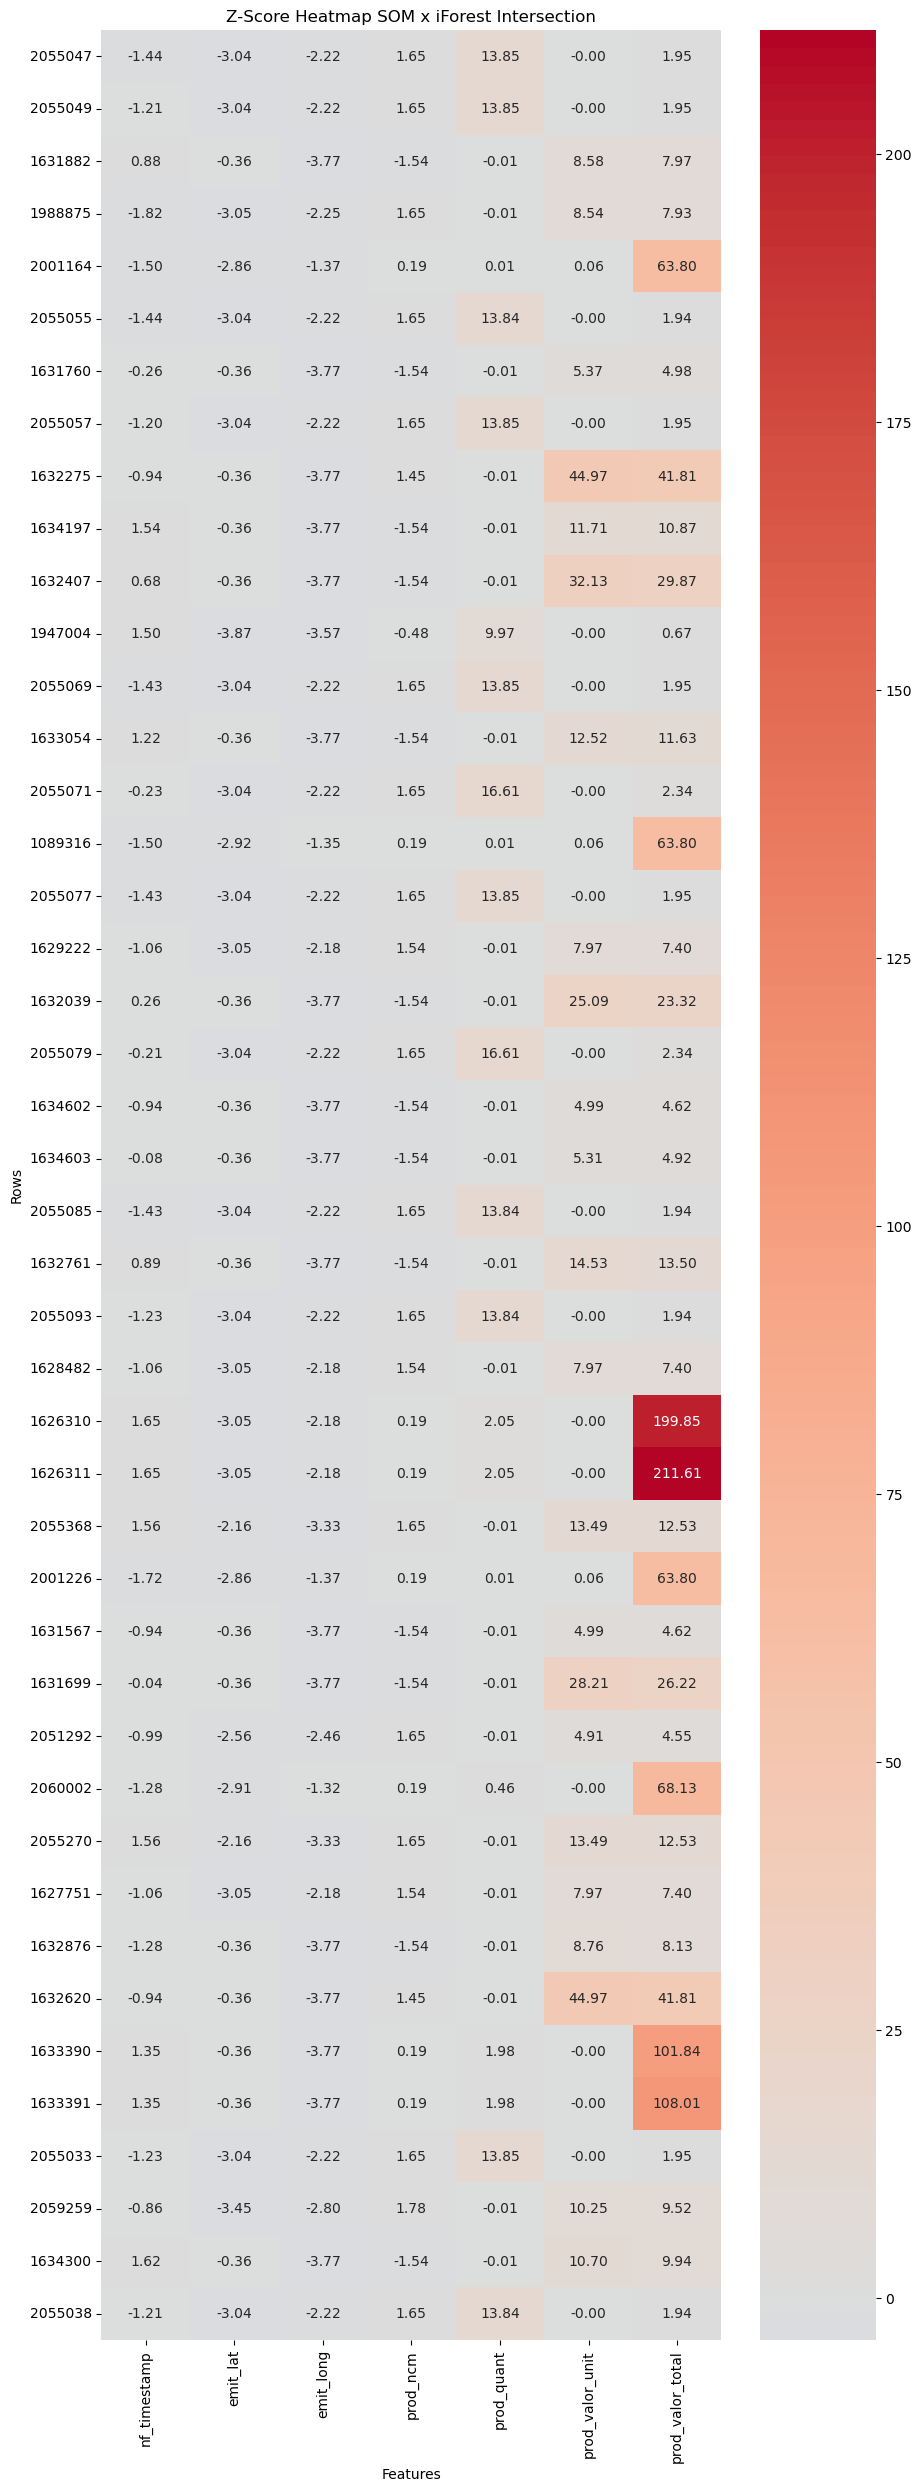

In [46]:
plt.figure(figsize=(10, 30))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM x iForest Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()